In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import os

In [2]:
# Desactivo warning molesto
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
os.getcwd()

'/home/cesar/universidad/7506/tp/2018_2C/tp2/tp2_lituarte/Datos-TP2'

In [4]:
os.chdir('/home/cesar/universidad/7506/tp/2018_2C/tp2/fiuba-trocafone-tp2-final-set/')

In [5]:
eventos = pd.read_csv('events_up_to_01062018.csv', low_memory=False)

In [6]:
labels = pd.read_csv('labels_training_set.csv')

In [7]:
eventos.shape

(2341681, 23)

In [8]:
labels.shape

(19414, 2)

In [9]:
eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
labels.head()

,person,label
0,0566e9c1,0
1,6ec7ee77,0
2,abe7a2fb,0
3,34728364,0
4,87ed62de,0


In [11]:
eventos["timestamp"] = pd.to_datetime(eventos["timestamp"])

El csv de labels tiene las personas y un booleano indicando si compraron. Por lo tanto mi objetivo es transformar el csv de eventos en uno que tenga información para cada persona.

In [12]:
# Como estoy evaluando a los usuarios no me interesa los eventos que no tengan una persona asociada
eventos.loc[eventos['person'].isnull() == True,:]

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version


Se me ocurre que podría extraer la columa "event" y hacer una columna por cada evento con un booleano, esto me ayudaria a contar la cantidad de veces que se registraron los eventos para cada usuario.

In [13]:
eventos['viewed_product'] = (eventos['event'] == 'viewed product')
eventos['brand_listing'] = (eventos['event'] == 'brand listing')
eventos['visited_site'] = (eventos['event'] == 'visited site')
eventos['ad_campaign_hit'] = (eventos['event'] == 'ad campaign hit') # no se usa
eventos['generic_listing'] = (eventos['event'] == 'generic listing')
eventos['searched_products'] = (eventos['event'] == 'searched products')
eventos['search_engine_hit'] = (eventos['event'] == 'search engine hit')
eventos['checkout'] = (eventos['event'] == 'checkout')
eventos['staticpage'] = (eventos['event'] == 'staticpage')
eventos['conversion'] = (eventos['event'] == 'conversion')
eventos['lead'] = (eventos['event'] == 'lead')

In [14]:
eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,viewed_product,brand_listing,visited_site,ad_campaign_hit,generic_listing,searched_products,search_engine_hit,checkout,conversion,lead
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,True,False,False,False,False,False,False,False,False,False
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,True,False,False,False,False,False,False,False,False,False
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,True,False,False,False,False,False,False,False,False,False
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,True,False,False,False,False,False,False,False,False,False
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,True,False,False,False,False,False,False,False,False,False


La columna "timestamp" me parece muy importante pero como voy a tener que agrupar todos los eventos de una persona a una sola fila necesito hacer algo con ella. Se me ocurre que puedo agregar columnas para determinar si cada evento tuvo lugar por ejemplo una columa por mes. Esta creación de columnas va a estar muy ligada al hecho que los datos que tenemos van desde principio de este año hasta junio.

In [15]:
eventos["mes"] = eventos["timestamp"].dt.month
eventos["dia"] = eventos["timestamp"].dt.day
eventos["semana"] = eventos["timestamp"].dt.week

In [16]:
# Obtengo la ultima fecha disponible en el csv para tener un punto de partida
ultima_fecha = eventos["timestamp"].max()
ultimo_dia = ultima_fecha.day
ultimo_mes = ultima_fecha.month
ultima_semana = ultima_fecha.week

In [17]:
# Agrego columnas para los m meses más cercanos
for m in range (0, ultimo_mes - 1):
    eventos["mes_pasado_" + str(m)] = (eventos["mes"] == (ultimo_mes - m))

In [18]:
eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,checkout,conversion,lead,mes,dia,semana,mes_pasado_0,mes_pasado_1,mes_pasado_2,mes_pasado_3
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,False,False,False,5,18,20,True,False,False,False
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,False,False,False,5,18,20,True,False,False,False
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,False,False,False,5,18,20,True,False,False,False
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,False,False,False,5,18,20,True,False,False,False
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,False,False,False,5,18,20,True,False,False,False


In [19]:
# Agrego columnas para las s semanas más cercanas
for s in range (0, 5):
    eventos["semana_pasada_" + str(s)] = (eventos["semana"] == (ultima_semana - s))

In [20]:
eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,semana,mes_pasado_0,mes_pasado_1,mes_pasado_2,mes_pasado_3,semana_pasada_0,semana_pasada_1,semana_pasada_2,semana_pasada_3,semana_pasada_4
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,20,True,False,False,False,False,False,True,False,False
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,20,True,False,False,False,False,False,True,False,False
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,20,True,False,False,False,False,False,True,False,False
3,2018-05-18 00:11:14,viewed product,2d681dd8,NaN,11890.0,iPhone 7,Bom,128GB,Vermelho,NaN,...,20,True,False,False,False,False,False,True,False,False
4,2018-05-18 00:11:09,viewed product,cccea85e,NaN,7517.0,LG G4 H818P,Excelente,32GB,Branco,NaN,...,20,True,False,False,False,False,False,True,False,False


In [21]:
eventos.columns

Index([u'timestamp', u'event', u'person', u'url', u'sku', u'model',
       u'condition', u'storage', u'color', u'skus', u'search_term',
       u'staticpage', u'campaign_source', u'search_engine', u'channel',
       u'new_vs_returning', u'city', u'region', u'country', u'device_type',
       u'screen_resolution', u'operating_system_version', u'browser_version',
       u'viewed_product', u'brand_listing', u'visited_site',
       u'ad_campaign_hit', u'generic_listing', u'searched_products',
       u'search_engine_hit', u'checkout', u'conversion', u'lead', u'mes',
       u'dia', u'semana', u'mes_pasado_0', u'mes_pasado_1', u'mes_pasado_2',
       u'mes_pasado_3', u'semana_pasada_0', u'semana_pasada_1',
       u'semana_pasada_2', u'semana_pasada_3', u'semana_pasada_4'],
      dtype='object')

In [22]:
eventos = eventos.loc[:,['person', 'viewed_product', 'brand_listing', 'visited_site',
        'generic_listing', 'searched_products',
       'search_engine_hit', 'checkout', 'conversion', 'lead',
       'mes_pasado_0', 'mes_pasado_1', 'mes_pasado_2', 'mes_pasado_3',
       'semana_pasada_0', 'semana_pasada_1', 'semana_pasada_2',
       'semana_pasada_3', 'semana_pasada_4']]

In [23]:
eventos.columns

Index([u'person', u'viewed_product', u'brand_listing', u'visited_site',
       u'generic_listing', u'searched_products', u'search_engine_hit',
       u'checkout', u'conversion', u'lead', u'mes_pasado_0', u'mes_pasado_1',
       u'mes_pasado_2', u'mes_pasado_3', u'semana_pasada_0',
       u'semana_pasada_1', u'semana_pasada_2', u'semana_pasada_3',
       u'semana_pasada_4'],
      dtype='object')

In [24]:
usuarios = eventos.groupby('person', as_index=False).sum()

In [25]:
usuarios.head()

,person,viewed_product,brand_listing,visited_site,generic_listing,searched_products,search_engine_hit,checkout,conversion,lead,mes_pasado_0,mes_pasado_1,mes_pasado_2,mes_pasado_3,semana_pasada_0,semana_pasada_1,semana_pasada_2,semana_pasada_3,semana_pasada_4
0,0008ed71,0.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
1,00091926,372.0,25.0,34.0,0.0,0.0,0.0,2.0,0.0,0.0,448.0,0.0,0.0,0.0,19.0,97.0,167.0,132.0,33.0
2,00091a7a,3.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000ba417,153.0,24.0,6.0,14.0,0.0,1.0,6.0,1.0,0.0,206.0,0.0,0.0,0.0,0.0,138.0,68.0,0.0,0.0
4,000c79fe,3.0,0.0,1.0,1.0,9.0,1.0,1.0,0.0,0.0,17.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0


In [26]:
# Incluyo solo los eventos de los usuarios que tengo labels
usuarios_con_labels = usuarios.loc[usuarios['person'].isin(labels['person'])]

In [27]:
usuarios_con_labels = usuarios_con_labels.set_index('person')

In [28]:
labels = labels.set_index('person')

In [29]:
usuarios_con_labels = usuarios_con_labels.join(labels, lsuffix='person', rsuffix='person')

In [30]:
usuarios_con_labels.head()

,viewed_product,brand_listing,visited_site,generic_listing,searched_products,search_engine_hit,checkout,conversion,lead,mes_pasado_0,mes_pasado_1,mes_pasado_2,mes_pasado_3,semana_pasada_0,semana_pasada_1,semana_pasada_2,semana_pasada_3,semana_pasada_4,label
person,,,,,,,,,,,,,,,,,,,
0008ed71,0.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0
000c79fe,3.0,0.0,1.0,1.0,9.0,1.0,1.0,0.0,0.0,17.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0
001802e4,4.0,0.0,1.0,4.0,4.0,0.0,1.0,0.0,0.0,19.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0
0019e639,189.0,165.0,19.0,28.0,11.0,13.0,15.0,2.0,0.0,290.0,69.0,0.0,82.0,0.0,70.0,181.0,0.0,108.0,0
001b0bf9,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0


In [31]:
X = usuarios_con_labels.iloc[:,:-1]

In [32]:
X.head()

,viewed_product,brand_listing,visited_site,generic_listing,searched_products,search_engine_hit,checkout,conversion,lead,mes_pasado_0,mes_pasado_1,mes_pasado_2,mes_pasado_3,semana_pasada_0,semana_pasada_1,semana_pasada_2,semana_pasada_3,semana_pasada_4
person,,,,,,,,,,,,,,,,,,
0008ed71,0.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0
000c79fe,3.0,0.0,1.0,1.0,9.0,1.0,1.0,0.0,0.0,17.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0
001802e4,4.0,0.0,1.0,4.0,4.0,0.0,1.0,0.0,0.0,19.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0
0019e639,189.0,165.0,19.0,28.0,11.0,13.0,15.0,2.0,0.0,290.0,69.0,0.0,82.0,0.0,70.0,181.0,0.0,108.0
001b0bf9,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0


In [33]:
Y = usuarios_con_labels.iloc[:,-1]

In [34]:
Y.head()

person
0008ed71    0
000c79fe    0
001802e4    0
0019e639    0
001b0bf9    0
Name: label, dtype: int64

In [35]:
# FIN DE LA PREPARACION DE LOS DATAFRAMES

In [36]:
##########################
### RANDOM FOREST ########
##########################

In [37]:


#Creo muestra de entrenamiento y de test
#predeccion train = X_train
#prediccion test  = X_test
#target     train = y_train
#target     test  = y_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2,random_state=123)


#Import de Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
#n_estitamator = numero de arboles que vamos a construir
rf_regressor = RandomForestRegressor(n_estimators=100)
#modelo sobre los datos de entrenamiento
rf_regressor = rf_regressor.fit(X_train,y_train)

#Predecimos para los valores del grupo Test
predictions = rf_regressor.predict(X_test)


In [38]:
from sklearn.model_selection import cross_validate
def rmse(y_real, y_pred):
    return np.sqrt(mean_squared_error(y_real, y_pred))

def rmse_cv(estimator, X, y):
    y_pred = estimator.predict(X)
    return rmse(y, y_pred)

def evaluar_modelo(estimador, X, y):
    resultados_estimador = cross_validate(estimador, X, y,
                     scoring="roc_auc", n_jobs=-1, cv=10, return_train_score=True)
    return resultados_estimador

resultados = {}

def ver_resultados():
    resultados_df  = pd.DataFrame(resultados).T
    resultados_cols = resultados_df.columns
    for col in resultados_df:
        resultados_df[col] = resultados_df[col].apply(np.mean)
        resultados_df[col+"_idx"] = resultados_df[col] / resultados_df[col].min()
    return resultados_df



In [39]:
## MEJORA DE HIPERPARAMETROS
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist_random = {
    "max_depth": [5, None],
    "max_features": sp_randint(1, 11),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "bootstrap": [True, False],
    "n_estimators": np.linspace(10,1000,10).astype(int)
   
}
parametros_busqueda_rf = {
    "criterion": ["gini", "entropy"],
    "n_estimators": np.linspace(10,1000,10).astype(int),
    "class_weight": [None, "balanced"]
}

In [40]:
rfr_model = RandomForestRegressor()
#clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
#                   cv=StratifiedKFold(Y, n_folds=5, shuffle=True), 
#                   scoring='roc_auc',
#                   verbose=2, refit=True)

clf = RandomizedSearchCV(estimator=rfr_model, 
                    param_distributions=param_dist_random,
                   scoring="roc_auc", n_jobs=-1, n_iter=10, random_state=7)

In [41]:
clf.fit(X_train,y_train)

/home/cesar/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcaa37f5f50>, 'n_estimators': array([  10,  120,  230,  340,  450,  560,  670,  780,  890, 1000]), 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcaa37f5a50>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcaa37f5890>, 'max_depth': [5, None]},
          pre_dispatch=

In [42]:
print(clf.best_score_)


0.851027279845


In [43]:
## llego al mejor resultado con RandomForest.
## Voy a aumentar la cantidad de interaciones

In [44]:
print(clf.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=450, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)


In [45]:
resultados["rfr_randomsearch"] = evaluar_modelo(clf.best_estimator_, X, Y)
ver_resultados()

,fit_time,score_time,test_score,train_score,fit_time_idx,score_time_idx,test_score_idx,train_score_idx
rfr_randomsearch,9.104944,0.081063,0.848764,0.871194,1.0,1.0,1.0,1.0


In [46]:
clf.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 9,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 450}

In [47]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score")

/home/cesar/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/cesar/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/cesar/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/cesar/anaconda2/lib/python2.7/

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
2,5.858009,0.156323,0.851027,0.880972,True,5,9,8,8,450,...,0.838254,0.883280,0.852912,0.879765,0.861916,0.879870,0.052973,0.001717,0.009751,0.001633
6,3.047880,0.122887,0.850856,0.879651,True,5,5,10,9,340,...,0.837217,0.882235,0.853859,0.878476,0.861493,0.878241,0.037757,0.002850,0.010135,0.001830
4,10.234340,0.287654,0.850782,0.880604,False,5,6,9,10,780,...,0.837714,0.883622,0.853680,0.879155,0.860954,0.879036,0.192402,0.015892,0.009707,0.002134
0,6.224754,0.121904,0.849645,0.878449,False,5,10,7,5,340,...,0.838008,0.881405,0.852077,0.876550,0.858850,0.877392,0.288870,0.004482,0.008681,0.002118
7,0.129048,0.007735,0.846553,0.874975,False,5,4,1,3,10,...,0.832544,0.878085,0.851394,0.873328,0.855720,0.873512,0.000413,0.000082,0.010062,0.002201
8,0.140719,0.007726,0.845191,0.873634,True,5,8,8,5,10,...,0.829112,0.874685,0.851803,0.873863,0.854658,0.872353,0.013174,0.000235,0.011429,0.000965
9,16.323308,0.341609,0.839519,0.989840,False,None,8,8,2,560,...,0.833351,0.990652,0.838387,0.990243,0.846819,0.988625,2.219729,0.039491,0.005556,0.000875
1,44.564579,0.793186,0.836438,0.990016,False,None,10,8,10,1000,...,0.828701,0.990782,0.837201,0.990563,0.843413,0.988702,0.917670,0.116405,0.006030,0.000933
5,5.253574,0.369176,0.835042,0.870567,False,5,1,3,10,1000,...,0.823427,0.873584,0.834052,0.868587,0.847646,0.869529,0.068609,0.008420,0.009912,0.002168
3,18.780183,0.470595,0.833940,0.997597,True,None,8,1,9,670,...,0.831499,0.997928,0.828347,0.997864,0.841974,0.996999,1.133709,0.015974,0.005825,0.000424


In [48]:
## Aumento las iteraciones a 100

In [49]:
clf_100 = RandomizedSearchCV(estimator=rfr_model, 
                    param_distributions=param_dist_random,
                   scoring="roc_auc", n_jobs=-1, n_iter=100)

In [50]:
clf_100.fit(X_train,y_train)

In [51]:
print(clf_100.best_score_)
#0.851300098178


In [52]:
#Conclusion
#El score tanto para 10 iteraciones como para 100 son similares 
#por lo tanto utilizo 10 iteraciones porque tarda menos tiempo

In [54]:
print(clf_100.best_estimator_)
print(clf_100.best_params_)

In [56]:
#best_parameters, score, _ = max(clf_100.best_score_, key=lambda x: x[1])
#print('Raw AUC score:', score)
#for param_name in sorted(best_parameters.keys()):
#    print("%s: %r" % (param_name, best_parameters[param_name]))

In [57]:
#resultados["reg_lineal_sin_seleccion"] = evaluar_modelo(LinearRegression(), X, Y)


In [58]:
#resultados["svr_sin_seleccion"] = evaluar_modelo(SVR(), X, Y)


In [59]:
#resultados["rf_sin_seleccion"] = evaluar_modelo(RandomForestRegressor(), X, Y)

In [60]:
#ver_resultados()

In [61]:
#### RANDOM FOREST - PRUEBA KAGGLE DATA TEST

In [62]:
# Ahora tengo que predecir los de prueba de Kaggle
ids_usuarios_kaggle = pd.read_csv('trocafone_kaggle_test.csv')

In [63]:
x_test_kaggle = usuarios.loc[usuarios['person'].isin(ids_usuarios_kaggle['person']), :]

In [64]:
x_test_kaggle.head()

,person,viewed_product,brand_listing,visited_site,generic_listing,searched_products,search_engine_hit,checkout,conversion,lead,mes_pasado_0,mes_pasado_1,mes_pasado_2,mes_pasado_3,semana_pasada_0,semana_pasada_1,semana_pasada_2,semana_pasada_3,semana_pasada_4
1,00091926,372.0,25.0,34.0,0.0,0.0,0.0,2.0,0.0,0.0,448.0,0.0,0.0,0.0,19.0,97.0,167.0,132.0,33.0
2,00091a7a,3.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000ba417,153.0,24.0,6.0,14.0,0.0,1.0,6.0,1.0,0.0,206.0,0.0,0.0,0.0,0.0,138.0,68.0,0.0,0.0
5,000e4d9e,339.0,17.0,13.0,17.0,0.0,5.0,1.0,0.0,0.0,411.0,0.0,0.0,0.0,75.0,141.0,195.0,0.0,0.0
6,000e619d,28.0,11.0,5.0,8.0,6.0,3.0,1.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0


In [65]:
x_test_kaggle = x_test_kaggle.set_index('person')

In [66]:
x_test_kaggle.head()

,viewed_product,brand_listing,visited_site,generic_listing,searched_products,search_engine_hit,checkout,conversion,lead,mes_pasado_0,mes_pasado_1,mes_pasado_2,mes_pasado_3,semana_pasada_0,semana_pasada_1,semana_pasada_2,semana_pasada_3,semana_pasada_4
person,,,,,,,,,,,,,,,,,,
00091926,372.0,25.0,34.0,0.0,0.0,0.0,2.0,0.0,0.0,448.0,0.0,0.0,0.0,19.0,97.0,167.0,132.0,33.0
00091a7a,3.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
000ba417,153.0,24.0,6.0,14.0,0.0,1.0,6.0,1.0,0.0,206.0,0.0,0.0,0.0,0.0,138.0,68.0,0.0,0.0
000e4d9e,339.0,17.0,13.0,17.0,0.0,5.0,1.0,0.0,0.0,411.0,0.0,0.0,0.0,75.0,141.0,195.0,0.0,0.0
000e619d,28.0,11.0,5.0,8.0,6.0,3.0,1.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0


In [80]:
#aplico el mejor.
rf_regressor = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=450, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

#modelo sobre los datos de entrenamiento
rf_regressor = rf_regressor.fit(X_train,y_train)

In [81]:
# Predecimos
preds_kaggle_rf = rf_regressor.predict(x_test_kaggle)

In [82]:
preds_kaggle_rf

array([ 0.05412255,  0.14767025,  0.05336904, ...,  0.11990367,
        0.08163497,  0.0091807 ])

In [83]:
#pd.DataFrame({'person': x_test_kaggle.index, 'label': preds_kaggle_rf}).to_csv('/home/cesar/universidad/7506/tp/2018_2C/tp2/fiuba-trocafone-tp2-final-set/test_random_forest_cc.csv', index=False, columns=['person', 'label'])

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# keep probabilities for the positive outcome only
#probs = probs[:, 1]
#preds_kaggle_rf = preds_kaggle_rf[:, 1]
preds_kaggle_rf


array([ 0.05412255,  0.14767025,  0.05336904, ...,  0.11990367,
        0.08163497,  0.0091807 ])

In [85]:
# calculate AUC
auc = roc_auc_score(y_test, predictions)
print('AUC: %.6f' % auc)

#200:  0.823462 0.838193-
#500:  0.833171
#1000: 0,836502
#1500: 0.835030 
#2000: 0.833163

# 1000 AUC: 0.836118

AUC: 0.820391


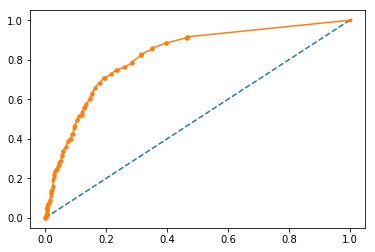

In [86]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [87]:
# Ahora tengo que predecir los de prueba de Kaggle
ids_usuarios_kaggle = pd.read_csv('/home/cesar/universidad/7506/tp/2018_2C/tp2/fiuba-trocafone-tp2-final-set/trocafone_kaggle_test.csv')

In [88]:
x_test_kaggle = usuarios.loc[usuarios['person'].isin(ids_usuarios_kaggle['person']), :]

In [89]:
x_test_kaggle.head()

,person,viewed_product,brand_listing,visited_site,generic_listing,searched_products,search_engine_hit,checkout,conversion,lead,mes_pasado_0,mes_pasado_1,mes_pasado_2,mes_pasado_3,semana_pasada_0,semana_pasada_1,semana_pasada_2,semana_pasada_3,semana_pasada_4
1,00091926,372.0,25.0,34.0,0.0,0.0,0.0,2.0,0.0,0.0,448.0,0.0,0.0,0.0,19.0,97.0,167.0,132.0,33.0
2,00091a7a,3.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000ba417,153.0,24.0,6.0,14.0,0.0,1.0,6.0,1.0,0.0,206.0,0.0,0.0,0.0,0.0,138.0,68.0,0.0,0.0
5,000e4d9e,339.0,17.0,13.0,17.0,0.0,5.0,1.0,0.0,0.0,411.0,0.0,0.0,0.0,75.0,141.0,195.0,0.0,0.0
6,000e619d,28.0,11.0,5.0,8.0,6.0,3.0,1.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0


In [90]:
x_test_kaggle = x_test_kaggle.set_index('person')

In [91]:
# Predecimos
preds_kaggle = rf_regressor.predict(x_test_kaggle)

In [92]:
preds_kaggle

array([ 0.05412255,  0.14767025,  0.05336904, ...,  0.11990367,
        0.08163497,  0.0091807 ])

In [93]:
pd.DataFrame({'person': x_test_kaggle.index, 'label': preds_kaggle}).to_csv('/home/cesar/universidad/7506/tp/2018_2C/tp2/fiuba-trocafone-tp2-final-set/test_cesar.csv', index=False, columns=['person', 'label'])